# **Identify healthy heartbeat and anomalies in heartbeat from ECG**

### Importing the packages

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

### Loading the DataSet

In [28]:
path = '/content/drive/MyDrive/data/ECG Heartbeat Categorization/'
normal_data = pd.read_csv(path + 'ptbdb_normal.csv', header=None)
abnormal_data = pd.read_csv(path + 'ptbdb_abnormal.csv', header=None)
train_data = pd.read_csv(path + 'mitbih_train.csv', header=None)

### Concatenating datasets and explore


In [29]:
train_data = pd.concat([normal_data, abnormal_data])

### Data Preprocessing

In [30]:
# Split the data into features (X) and target labels (y)
X = train_data.iloc[:, :-1].values
y = train_data.iloc[:, -1].values


In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Building the Random forest classifier

In [33]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [34]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)


### Model Evaluation

In [35]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.971830985915493

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.93      0.95       834
         1.0       0.97      0.99      0.98      2077

    accuracy                           0.97      2911
   macro avg       0.97      0.96      0.97      2911
weighted avg       0.97      0.97      0.97      2911



In [17]:
#Make Predictions
y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int)

685/685 [==============================] - 1s 1ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

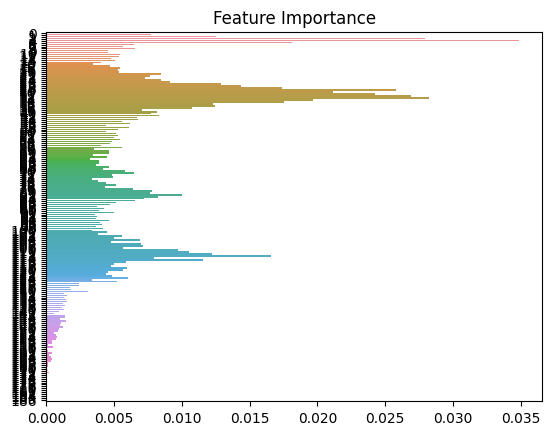

In [36]:
# Visualize feature importance (if needed)
feature_importance = classifier.feature_importances_
feature_names = [str(i) for i in range(X.shape[1])]
sns.barplot(x=feature_importance, y=feature_names)
plt.title("Feature Importance")
plt.show